In [4]:
%matplotlib inline

In [5]:
import json
import dateutil.parser
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

In [32]:
END_OF_SEMESTER = datetime(2019, 12, 18)

In [6]:
with open('transactions.json') as f:
    transactions = json.load(f)

In [7]:
transaction_index = defaultdict(list)
for txn in transactions:
    txn['parsedDate'] = dateutil.parser.parse(txn['actualDate'])
    transaction_index[txn['accountName']].append(txn)

In [8]:
for account_name in transaction_index:
    transaction_index[account_name].sort(key = lambda txn: txn['parsedDate'])

In [9]:
transaction_index.keys()

dict_keys(['Garnet Plan', 'Swat Points', 'Dining Dollars', 'Guest', 'Print Services Credit', 'Swat Plan'])

In [10]:
def to_points(transactions):
    dates = [txn['parsedDate'] for txn in transactions]
    totals = [txn['resultingBalance'] for txn in transactions]
    return dates, totals

In [28]:
def plot_plan(title, transactions):
    fig, ax = plt.subplots()
    plt.title(title)
    fig.autofmt_xdate()

    dates, totals = to_points(transactions)
    ax.plot_date(dates, totals, 'b-')
    
    first_date = transactions[0]['parsedDate']
    last_date = END_OF_SEMESTER
    min_balance = 0
    max_balance = max([txn['resultingBalance'] for txn in transactions])
    ax.plot_date((first_date, last_date), (max_balance, min_balance), 'r-')

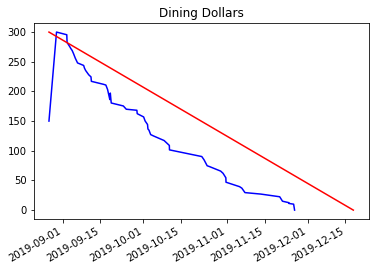

In [29]:
plot_plan('Dining Dollars', transaction_index['Dining Dollars'])

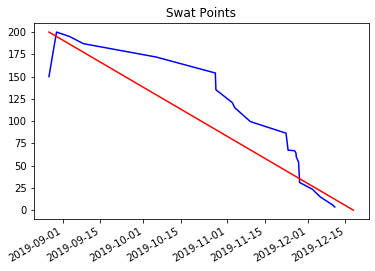

In [30]:
plot_plan('Swat Points', transaction_index['Swat Points'])

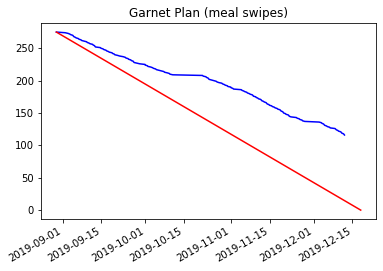

In [31]:
plot_plan('Garnet Plan (meal swipes)', transaction_index['Garnet Plan'])